In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Generate CAM (Class Activation Map)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from constant import CSV_DIR, CLASS_NAMES
import numpy as np

from fastai.conv_learner import *
# import pixiedust
from matplotlib.patches import Rectangle
from datetime import datetime
import pandas as pd

import torch
from layers import *
from constant import CLASS_NAMES
from transform import chest_xray_transfrom
from metrics import *
import pretrainedmodels
from recorder import TrainingRecoder
import pretrainedmodels
from dataset import ChestXray14Dataset
from model_data import ModelData
from chexnet import ChexNet

In [3]:
PATH = Path('/home/dattran/data/xray-thesis/chestX-ray14')
IMAGE_DN = 'images'
IMAGE_NAME = '00007551_000.png'
sz = 224

    
densenet = pretrainedmodels.__dict__['densenet121']()
tfms = chest_xray_transfrom(densenet, sz, .875)

In [4]:
def plot_xray_image(xray_image): # , blended_images, predict_label, true_label
    plt.imshow(xray_image, cmap = 'gray', interpolation = 'bicubic')
    plt.title('Orig X Ray')
    plt.axis('off')
    plt.show()
    
def plot_blended(blended_image, predict_label, prob):
    blended_plot = plt.imshow(blended_image, interpolation = 'bicubic')
    plt.title('%s %.2f%%' % (predict_label, prob * 100))
    plt.axis('off')
    plt.show()

In [5]:
class FeatureHook:
    features = None
    
    def __init__(self, m):
        self.hook = m.register_forward_hook(self.hook_fn)
    
    def hook_fn(self, module, input, output):
        self.features = output
        
    def remove(self):
        self.hook.remove()

In [3]:
from cam_generator import CAMGenerator


cam_generator = CAMGenerator(architecture='models.densenet',
                             variant='densenet121',
                             model_name='20181216-133659')
strong_chexnet_test = '%s/chexnet_strong_test.csv' % CSV_DIR
df = pd.read_csv(strong_chexnet_test, header=None, delimiter=' ')

Network


/home/dattran/miniconda3/envs/thesis/lib/python3.5/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [4]:
onehot = [False, True, False, False, False, False, False, False, False, False, False, False, False, False]
ids = np.where(onehot)[0]
', '.join(np.take(CLASS_NAMES, ids))

'Cardiomegaly'

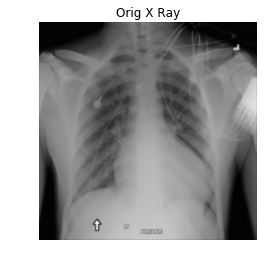

Groundtruth: Cardiomegaly


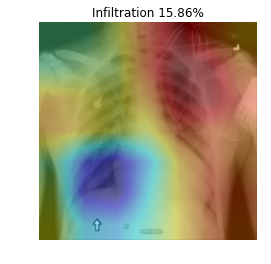

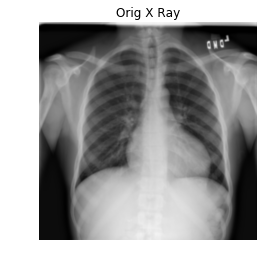

Groundtruth: Cardiomegaly
Normal


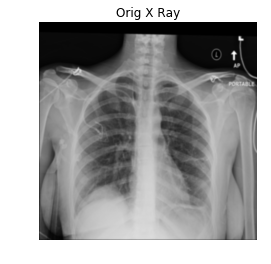

Groundtruth: Mass


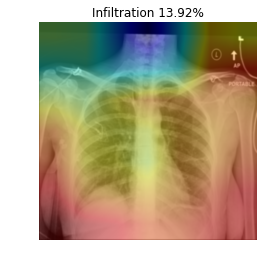

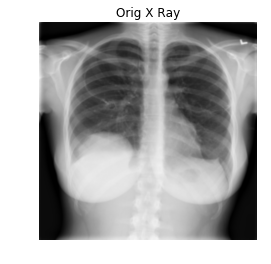

Groundtruth: Atelectasis, Mass
Normal


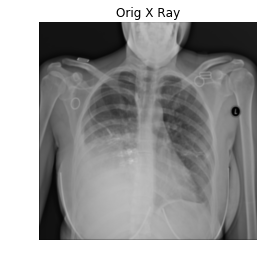

Groundtruth: Effusion, Mass, Consolidation


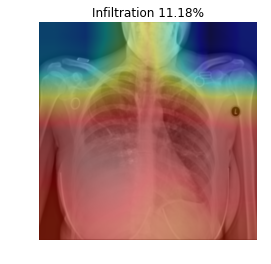

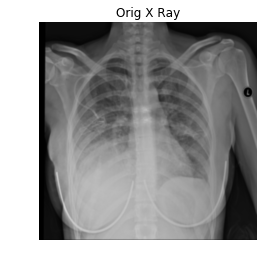

Groundtruth: Effusion, Infiltration


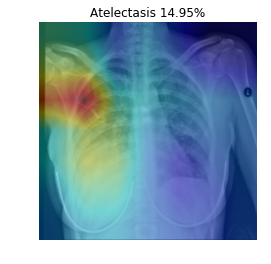

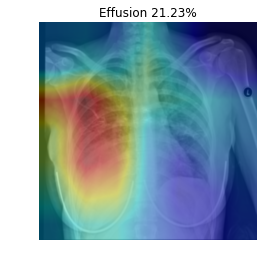

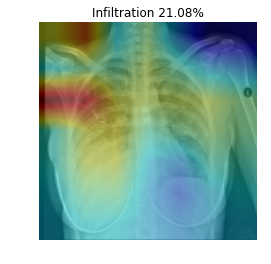

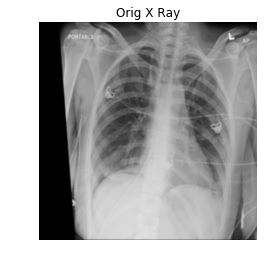

Groundtruth: Pneumothorax


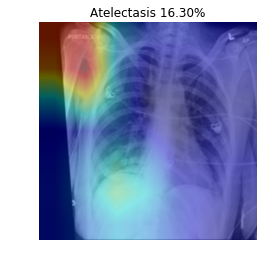

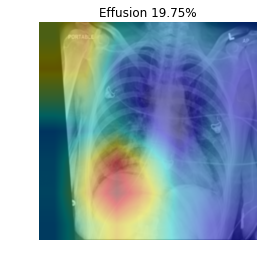

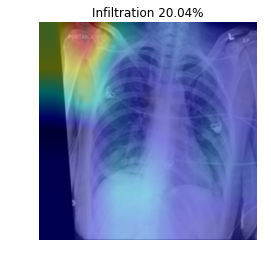

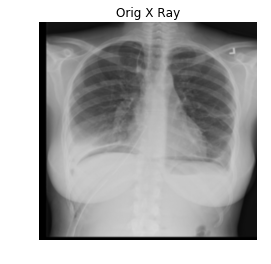

Groundtruth: Pneumothorax


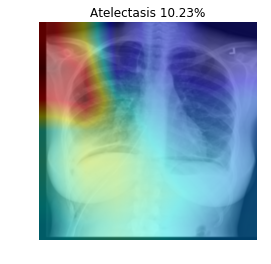

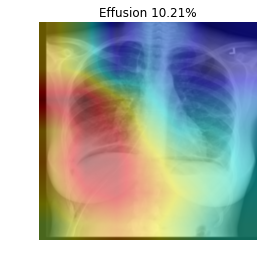

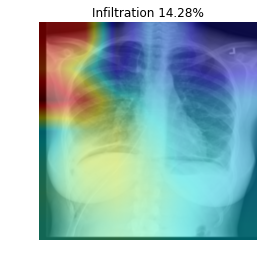

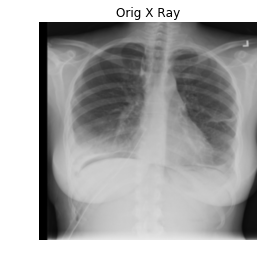

Groundtruth: Pneumothorax


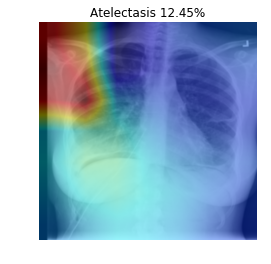

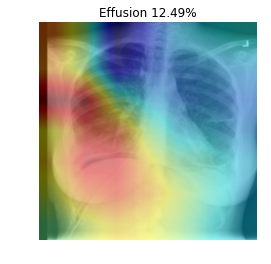

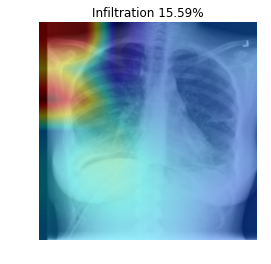

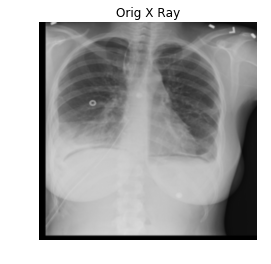

Groundtruth: Effusion, Pneumothorax


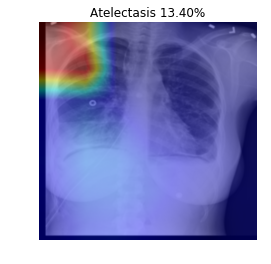

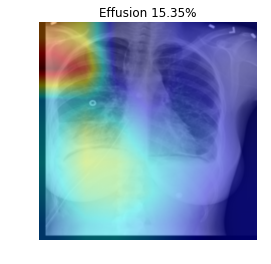

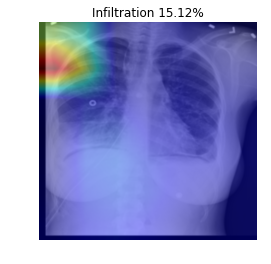

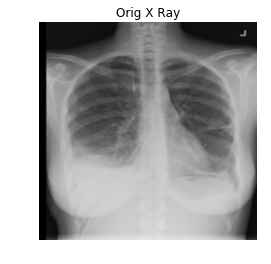

Groundtruth: Pneumothorax


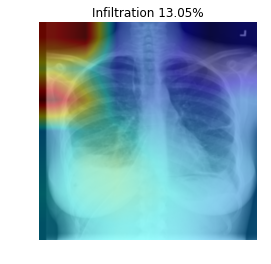

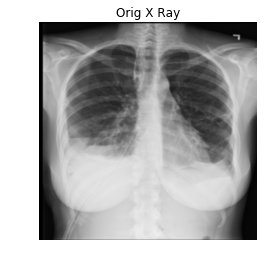

Groundtruth: Normal


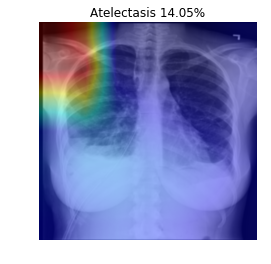

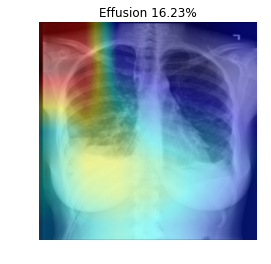

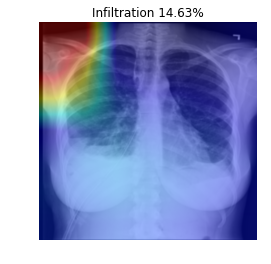

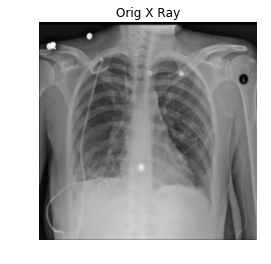

Groundtruth: Effusion, Pneumothorax


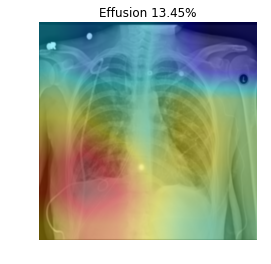

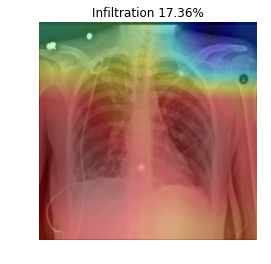

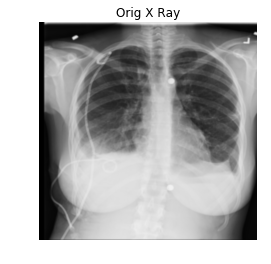

Groundtruth: Effusion, Pneumothorax


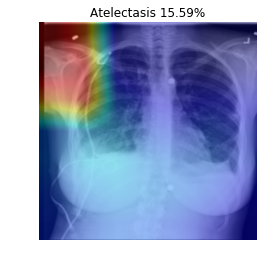

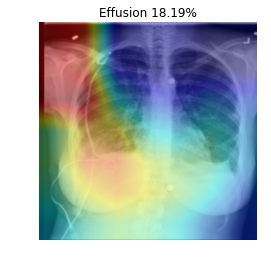

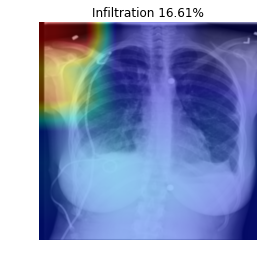

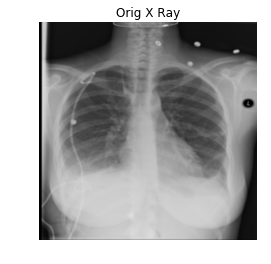

Groundtruth: Effusion


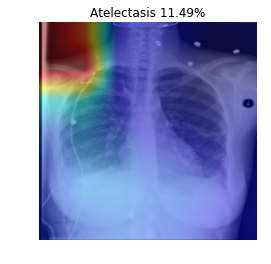

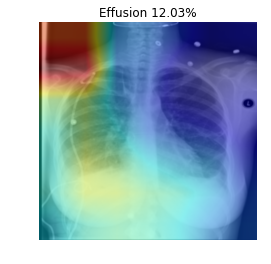

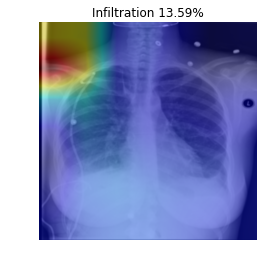

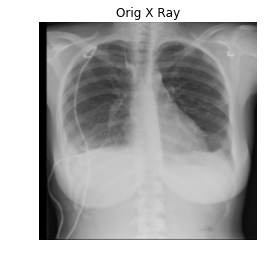

Groundtruth: Effusion


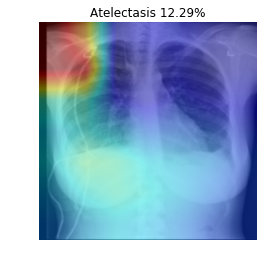

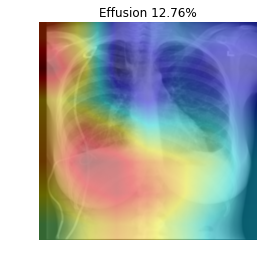

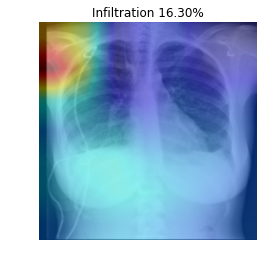

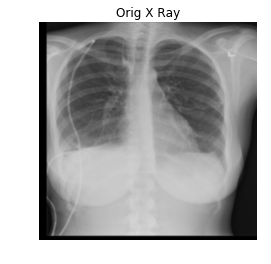

Groundtruth: Normal


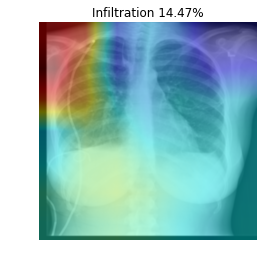

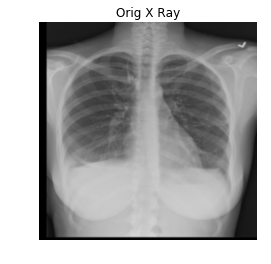

Groundtruth: Atelectasis, Effusion


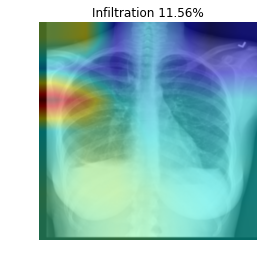

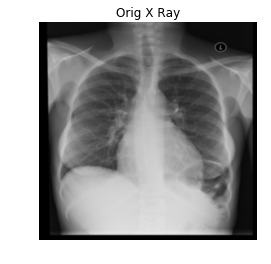

Groundtruth: Cardiomegaly


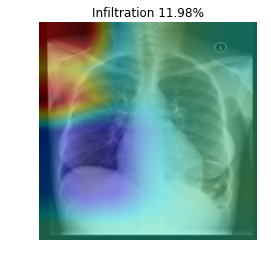

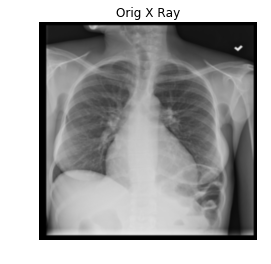

Groundtruth: Cardiomegaly


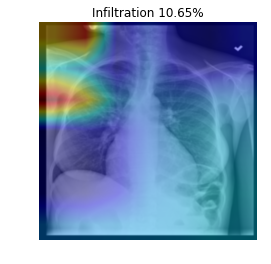

In [5]:
for i, r in enumerate(df.iterrows()):
    if i < 20:
        continue
    if i >= 40:
        break
        
    r = r[1]
    image_file = r[1]
    onehot = r[2:].values
    if np.sum(onehot) == 0:
        gt = 'Normal'
    else:
        ids = np.where(onehot)[0]
        gt = ', '.join(np.take(CLASS_NAMES, ids))
    image, results = cam_generator.cam(image_file)
    plot_xray_image(image)
    print('Groundtruth:', gt)
    if results == 'NORMAL':
        print('Normal')
    else:
        for (blended, disease, prob) in results:
            plot_blended(blended, disease, prob)
    print('=' * 40)
    